# Model to predict whether workers will leave based on the variables 'satisfaction_level', 'average_monthly_hours', 'promotion_last_5_years', and 'salary'.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


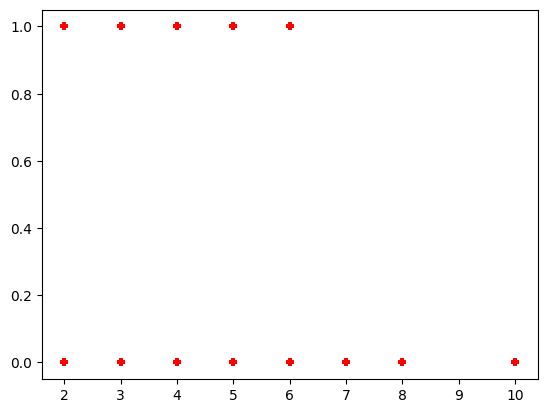

In [3]:
plt.scatter(df.time_spend_company,df.left,marker='+',color='red')

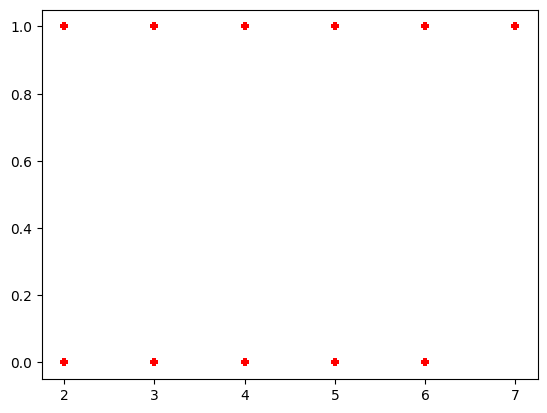

In [4]:
plt.scatter(df.number_project,df.left,marker='+',color='red')

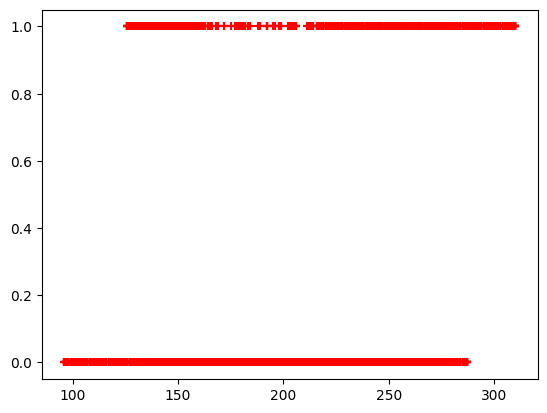

In [5]:
plt.scatter(df.average_montly_hours	,df.left,marker='+',color='red')

In [6]:
df.shape

(14999, 10)

<Axes: xlabel='salary'>

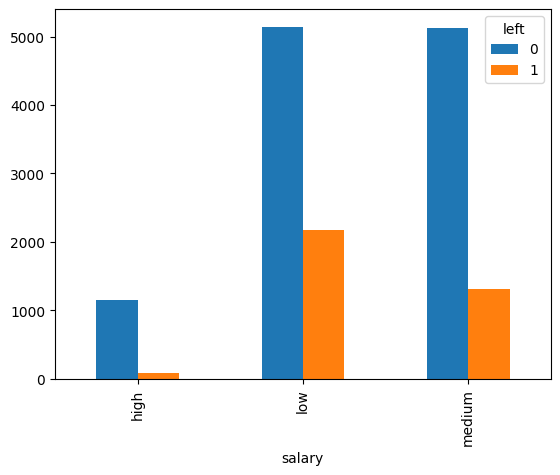

In [7]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

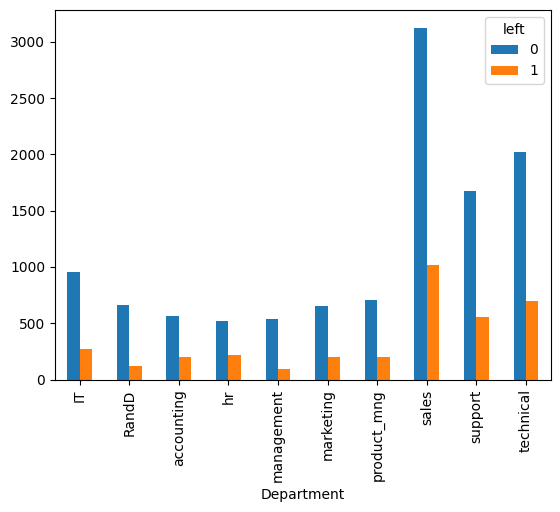

In [8]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [9]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [10]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
salary_dummies = salary_dummies.astype(int)
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [11]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [12]:
df_with_dummies.drop(['salary' , 'salary_medium'],axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [13]:
x = df_with_dummies
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [14]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [17]:
x_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
196,0.27,278,0,0,1
9144,0.16,196,0,0,1
6895,0.69,128,0,0,0
12656,0.79,235,0,0,0
4331,0.96,246,0,0,1
...,...,...,...,...,...
1065,0.43,142,0,0,1
5407,0.49,229,0,0,1
7161,0.76,137,0,0,1
8065,0.66,256,0,0,0


In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [19]:
model.fit(x_train, y_train)

C:\Users\Mark Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
model.predict(x_test)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
model.score(x_test, y_test)

0.7746666666666666

In [22]:
# Accuracy Clear Output
score = model.score(x_test, y_test)
accuracy_score = score * 100

print("Model Accuracy Score is {:.2f}%".format(accuracy_score))

Model Accuracy Score is 77.47%


In [23]:
model.predict_proba(x_test)

array([[0.39618615, 0.60381385],
       [0.35299204, 0.64700796],
       [0.88461413, 0.11538587],
       ...,
       [0.85230403, 0.14769597],
       [0.82990412, 0.17009588],
       [0.79745854, 0.20254146]])

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model